In [1]:
import pandas as pd

exams_results = pd.read_csv('exams.csv')
exams_results.head()

,id,diagnostic,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6,exam_7,exam_8,...,exam_24,exam_25,exam_26,exam_27,exam_28,exam_29,exam_30,exam_31,exam_32,exam_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
exams_results.isnull().sum()

id              0
diagnostic      0
exam_1          0
exam_2          0
exam_3          0
exam_4          0
exam_5          0
exam_6          0
exam_7          0
exam_8          0
exam_9          0
exam_10         0
exam_11         0
exam_12         0
exam_13         0
exam_14         0
exam_15         0
exam_16         0
exam_17         0
exam_18         0
exam_19         0
exam_20         0
exam_21         0
exam_22         0
exam_23         0
exam_24         0
exam_25         0
exam_26         0
exam_27         0
exam_28         0
exam_29         0
exam_30         0
exam_31         0
exam_32         0
exam_33       419
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

exams_values = exams_results.drop(columns=['id', 'diagnostic'])
diagnostics = exams_results['diagnostic']

exams_values_without_null = exams_values.drop(columns='exam_33')


train_x, test_x, train_y, test_y = train_test_split(exams_values_without_null, diagnostics, test_size=0.3)

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_x, train_y)
accuracy = classifier.score(test_x, test_y)
print(f'Accuracy of {accuracy * 100}')

Accuracy of 92.39766081871345


In [5]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(train_x, train_y)

dummy_accuracy = dummy_classifier.score(test_x, test_y)
print(f'Accuracy of {dummy_accuracy * 100}')

Accuracy of 66.66666666666666


<AxesSubplot:xlabel='exams', ylabel='values'>

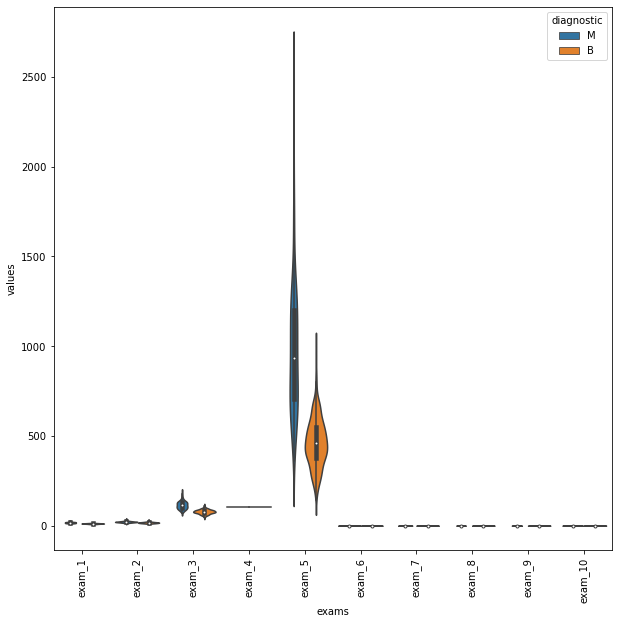

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data_plot = pd.concat([diagnostics, exams_values_without_null.iloc[:,0:10]], axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostic", var_name="exams", value_name="values")

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.violinplot(x = "exams", y = "values", hue="diagnostic", data = data_plot)

<AxesSubplot:xlabel='exams', ylabel='values'>

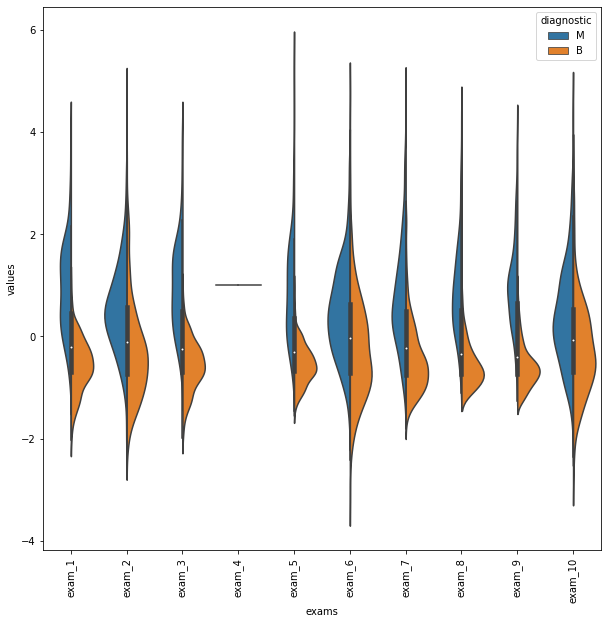

In [7]:
#Performing visualization

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(exams_values_without_null)
standarized_values = standardizer.transform(exams_values_without_null)

standarized_values = pd.DataFrame(data = standarized_values,
                                  columns = exams_values_without_null.keys())

data_plot = pd.concat([diagnostics, standarized_values.iloc[:,0:10]], axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostic", var_name="exams", value_name="values")

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.violinplot(x = "exams", y = "values", hue="diagnostic", data = data_plot, split=True)





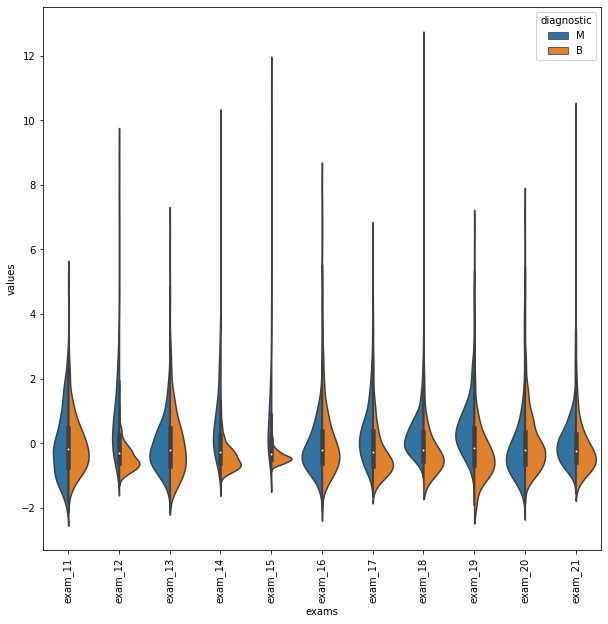

In [8]:
def violin_graphic(values, beginning, end):
    data_plot = pd.concat([diagnostics, values.iloc[:,beginning:end]], axis = 1)
    data_plot = pd.melt(data_plot, id_vars="diagnostic", var_name="exams", value_name="values")

    plt.figure(figsize=(10,10))
    plt.xticks(rotation = 90)
    sns.violinplot(x = "exams", y = "values", hue="diagnostic", data = data_plot, split=True)

violin_graphic(standarized_values, 10, 21)

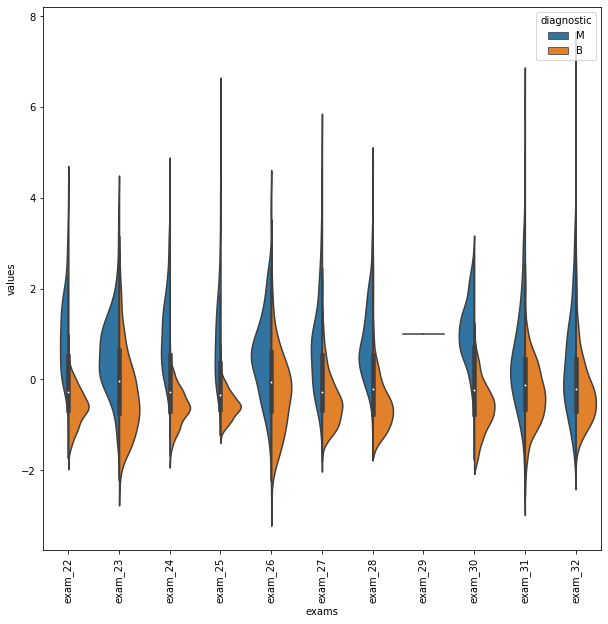

In [9]:
violin_graphic(standarized_values, 21, 32)

In [10]:
standarized_values_without_consts = standarized_values.drop(columns=['exam_29', 'exam_4'])

def classify(values):
    SEED = 1234
    random.seed(SEED)
    train_x, test_x, train_y, test_y = train_test_split(values, diagnostics, test_size=0.3)
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(train_x, train_y)
    accuracy = classifier.score(test_x, test_y)
    print(f'Accuracy of {accuracy * 100}')

classify(standarized_values_without_consts)

Accuracy of 92.98245614035088


<AxesSubplot:>

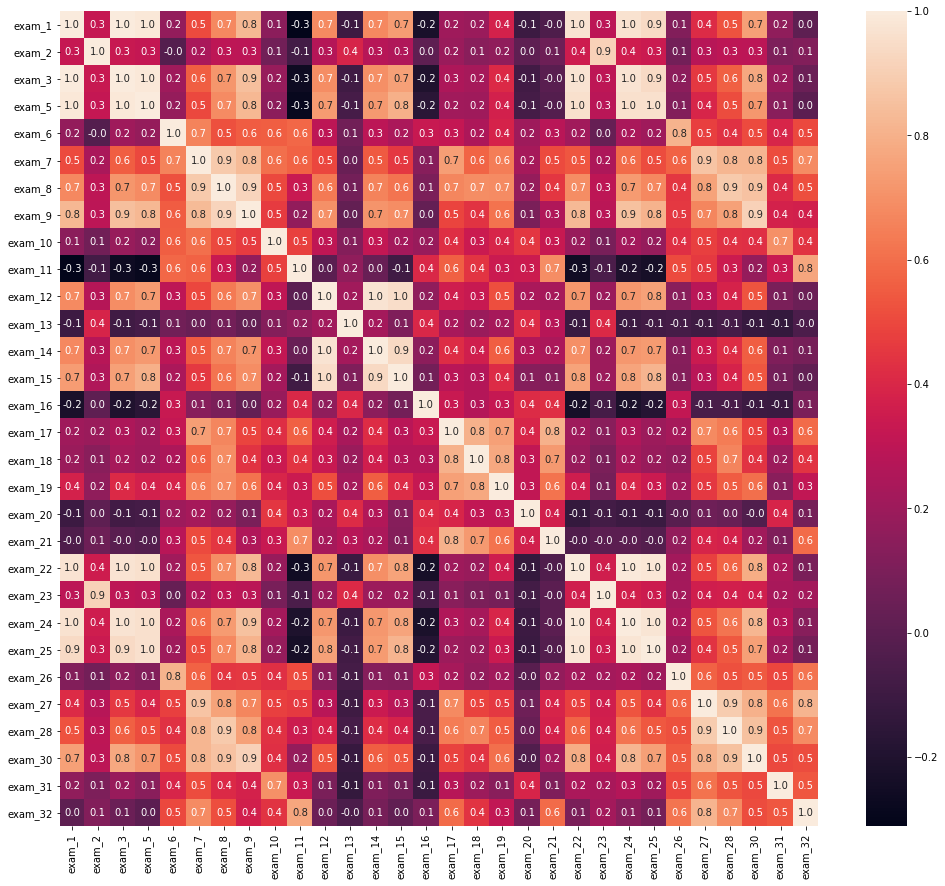

In [11]:
correlation_matrix = standarized_values_without_consts.corr()
plt.figure(figsize=(17,15))
sns.heatmap(correlation_matrix, annot = True, fmt= ".1f")

In [12]:
significant_correlation_matrix = correlation_matrix[correlation_matrix > 0.99]
significant_correlation_matrix

,exam_1,exam_2,exam_3,exam_5,exam_6,exam_7,exam_8,exam_9,exam_10,exam_11,...,exam_22,exam_23,exam_24,exam_25,exam_26,exam_27,exam_28,exam_30,exam_31,exam_32
exam_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exam_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
significant_correlation_matrix_clean = significant_correlation_matrix.sum()
significant_correlation_matrix_clean

exam_1     1.997855
exam_2     1.000000
exam_3     1.997855
exam_5     1.000000
exam_6     1.000000
exam_7     1.000000
exam_8     1.000000
exam_9     1.000000
exam_10    1.000000
exam_11    1.000000
exam_12    1.000000
exam_13    1.000000
exam_14    1.000000
exam_15    1.000000
exam_16    1.000000
exam_17    1.000000
exam_18    1.000000
exam_19    1.000000
exam_20    1.000000
exam_21    1.000000
exam_22    1.993708
exam_23    1.000000
exam_24    1.993708
exam_25    1.000000
exam_26    1.000000
exam_27    1.000000
exam_28    1.000000
exam_30    1.000000
exam_31    1.000000
exam_32    1.000000
dtype: float64

In [14]:
highly_correlated_variables = significant_correlation_matrix_clean[significant_correlation_matrix_clean > 1]
highly_correlated_variables

exam_1     1.997855
exam_3     1.997855
exam_22    1.993708
exam_24    1.993708
dtype: float64

In [15]:
treated_exams_values  = standarized_values_without_consts.drop(columns=highly_correlated_variables.keys())
treated_exams_values

,exam_2,exam_5,exam_6,exam_7,exam_8,exam_9,exam_10,exam_11,exam_12,exam_13,...,exam_20,exam_21,exam_23,exam_25,exam_26,exam_27,exam_28,exam_30,exam_31,exam_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [16]:
classify(treated_exams_values)

Accuracy of 91.81286549707602


In [17]:
clean_data = standarized_values_without_consts.drop(columns=["exam_3", "exam_24"])
classify(clean_data)

Accuracy of 92.98245614035088


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kbest = SelectKBest(chi2, k = 5)
select_kbest

SelectKBest(k=5, score_func=<function chi2 at 0x0000022C9856C040>)

In [39]:
clean_exams_values = exams_values_without_null.drop(columns=["exam_4", "exam_29", "exam_3", "exam_24"])

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(clean_exams_values, diagnostics, test_size=0.3)

select_kbest.fit(train_x, train_y)
train_kbest = select_kbest.transform(train_x)
test_kbest = select_kbest.transform(test_x)

test_kbest.shape

(171, 5)

In [40]:
classifier = RandomForestClassifier(n_estimators=100, random_state = 1234)
classifier.fit(train_kbest, train_y)

accuracy = classifier.score(test_kbest, test_y)
print(f'Accuracy of {accuracy * 100}')

Accuracy of 92.39766081871345


In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix_results = confusion_matrix(test_y, classifier.predict(test_kbest))
confusion_matrix_results

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 38.5, 'Prediction'), Text(56.5, 0.5, 'Reality')]

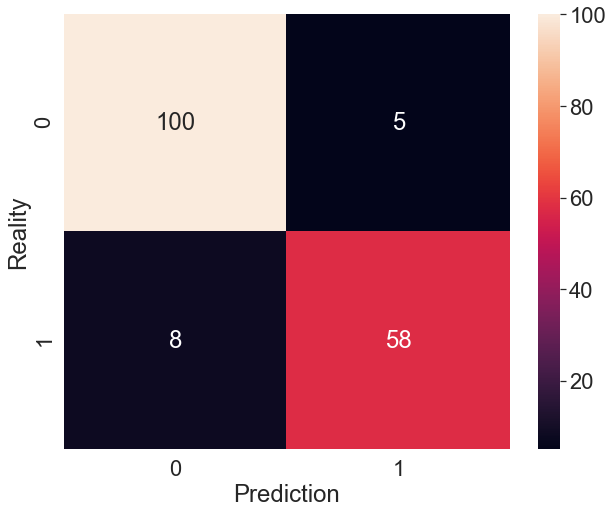

In [47]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.heatmap(confusion_matrix_results, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel="Reality")

Accuracy of 90.05847953216374


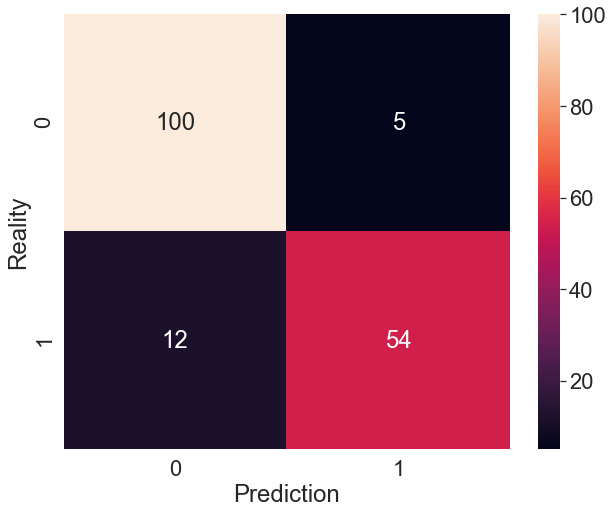

In [51]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(clean_exams_values, diagnostics, test_size=0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state = 1234)
classifier.fit(train_x, train_y)

select_rfe = RFE(estimator = classifier, n_features_to_select=5, step=1)
select_rfe.fit(train_x, train_y)
train_rfe = select_rfe.transform(train_x)
test_rfe = select_rfe.transform(test_x)

classifier.fit(train_rfe, train_y)
accuracy = classifier.score(test_rfe, test_y)

confusion_matrix_results = confusion_matrix(test_y, classifier.predict(test_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.heatmap(confusion_matrix_results, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel="Reality")

print(f'Accuracy of {accuracy * 100}')

Accuracy of 92.98245614035088


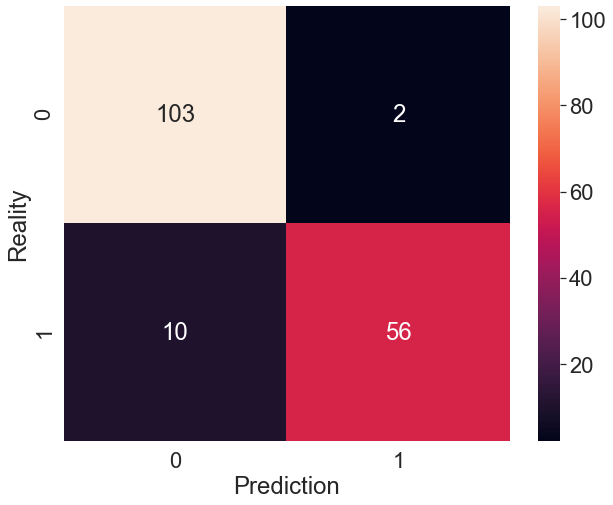

In [57]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(clean_exams_values, diagnostics, test_size=0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state = 1234)
classifier.fit(train_x, train_y)

select_rfecv = RFECV(estimator = classifier, cv=5, step=1, scoring='accuracy')
select_rfecv.fit(train_x, train_y)
train_rfecv = select_rfecv.transform(train_x)
test_rfecv = select_rfecv.transform(test_x)

classifier.fit(train_rfecv, train_y)


confusion_matrix_results = confusion_matrix(test_y, classifier.predict(test_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.heatmap(confusion_matrix_results, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel="Reality")

accuracy = classifier.score(test_rfecv, test_y)
print(f'Accuracy of {accuracy * 100}')

In [61]:
train_x.columns[select_rfecv.support_]

Index(['exam_1', 'exam_2', 'exam_5', 'exam_6', 'exam_7', 'exam_8', 'exam_9',
       'exam_10', 'exam_12', 'exam_13', 'exam_14', 'exam_15', 'exam_16',
       'exam_18', 'exam_19', 'exam_20', 'exam_21', 'exam_22', 'exam_23',
       'exam_25', 'exam_26', 'exam_27', 'exam_28', 'exam_30', 'exam_31',
       'exam_32'],
      dtype='object')

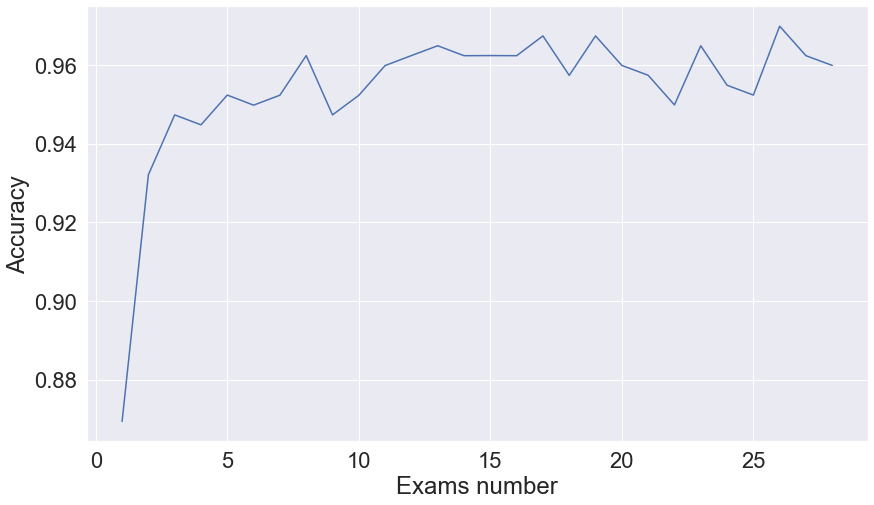

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Exams number")
plt.ylabel("Accuracy")
plt.plot(range(1, len(select_rfecv.grid_scores_) + 1), select_rfecv.grid_scores_)
plt.show()

In [68]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(clean_exams_values, diagnostics, test_size=0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state = 1234)
classifier.fit(train_x, train_y)

select_rfe = RFE(estimator = classifier, n_features_to_select=2, step=1)
select_rfe.fit(train_x, train_y)
train_rfe = select_rfe.transform(train_x)
test_rfe = select_rfe.transform(test_x)

classifier.fit(train_rfe, train_y)
accuracy = classifier.score(test_rfe, test_y)

confusion_matrix_results = confusion_matrix(test_y, classifier.predict(test_rfe))

rfe_clean_exam_values = select_rfe.transform(clean_exams_values)
rfe_clean_exam_values.shape

(569, 2)

<AxesSubplot:>

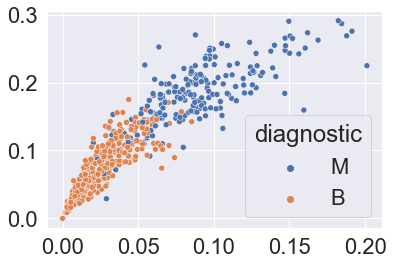

In [69]:
sns.scatterplot(x = rfe_clean_exam_values[:,0],y=rfe_clean_exam_values[:,1], hue= diagnostics)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_exam_values = pca.fit_transform(clean_data)
pca_exam_values

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

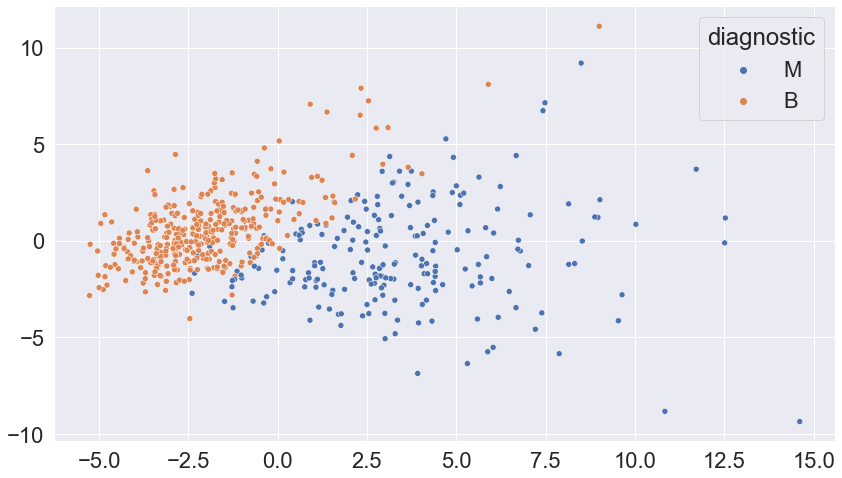

In [93]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = pca_exam_values[:,0],y=pca_exam_values[:,1], hue= diagnostics)


<AxesSubplot:>

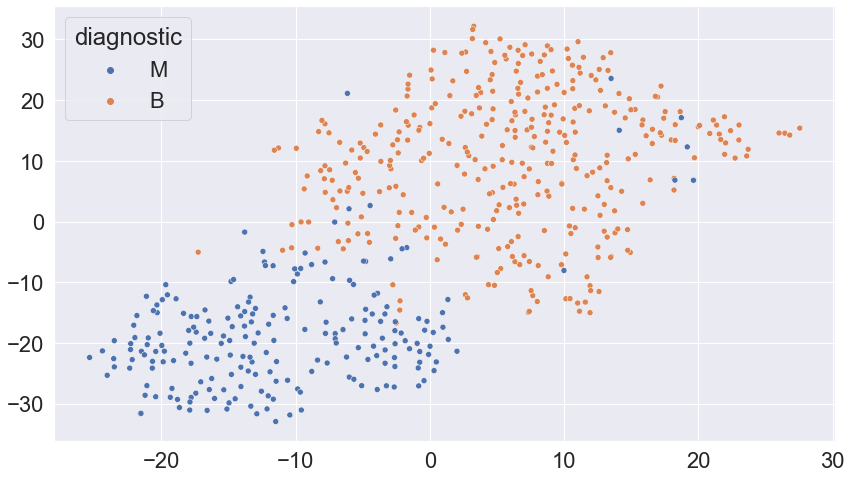

In [97]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
tsne_values = tsne.fit_transform(clean_data)
plt.figure(figsize=(14,8))
sns.scatterplot(x = tsne_values[:,0] , y = tsne_values[:,1], hue = diagnostics)